# Nutzungsanalyse Garage

In diesem Notebook analysieren wir verschiedene Nutzungstypen und entwickeln benchmarks.
Nachfolgend eine kurze Beschreibung der Hauptnutzungen.


In [7]:
import textwrap
import src.package.importer as im
import src.package.importer_usages as im_usages

df = im.get_dataset('../package/dataset.csv')
df, short_df = im_usages.extract_usage_details(df, True)
df = im_usages.extract_garage_details(df, False)

short_df[im_usages.NOM_PRIMARY_USAGE].value_counts()

id                                                   353
source                               wbw_193_1993_3     
verification_status                          VERIFIED_OK
title                  Überbauung Hellmutstrasse, Zürich
neubau_umbau                                      NEUBAU
                                     ...                
nom_bki_kostenstand                                  NaN
total_expenses                                13647000.0
cost_ref_gf                                       6380.0
cost_ref_gfs                                      3660.0
ratio_hnf_gf                                         NaN
Name: 217, Length: 186, dtype: object


WOHNBAUTEN__MFH_MEDIUM                                                                149
SCHULBAUTEN__VOLKSSCHULEN                                                              95
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN     52
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                       35
WOHNBAUTEN__MFH_LOW                                                                    33
                                                                                     ... 
VERKEHRSBAUTEN__BAHNBETRIEB                                                             1
VERKEHRSBAUTEN__HOCH_TIEFGARAGE__TIEFGARAGE__PARKHAUS                                   1
VERKEHRSBAUTEN__ZOLL__ZOLLGEBAEUDE                                                      1
GESUNDHEITSBAUTEN__UNIVERSITAETSKLINIKEN_FORSCHUNG                                      1
LADENBAUTEN_HANDELSBAUTEN__MARKTHALLEN                                                  1
Name: nom_

## Benchmarks
Nachfolgend einige einfache Benchmarks zu den Nuzungstypen.

#### Garage vorhanden pro Nutzugstyp

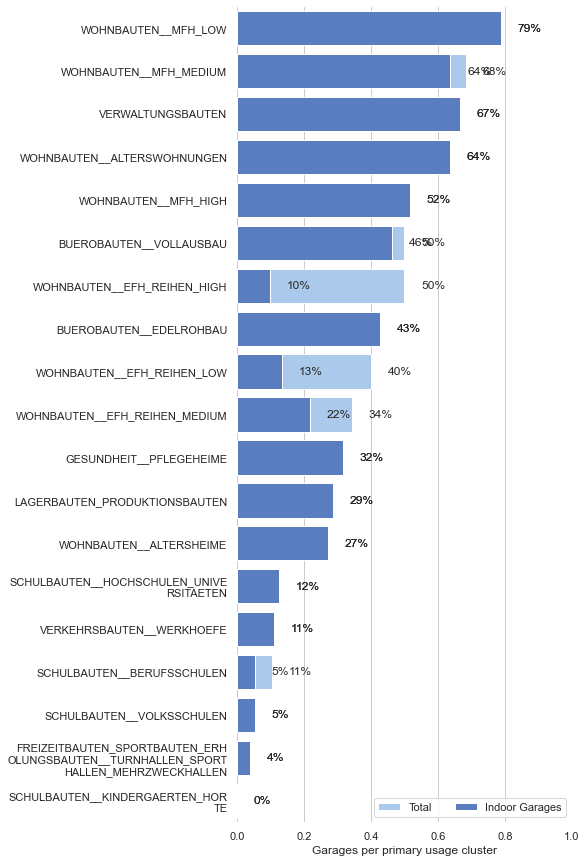

In [8]:
import feature_engineering.garages as grg
import feature_engineering.general as gen

MIN_ITEMS = 10 # minimal num of entries for usage type to be considered
SHOW_MAX = 20 # max largest values to display

garages = grg.garage_count_per_usage(df)
garages = gen.drop_lessthan(garages, MIN_ITEMS)
garages = garages[[im_usages.NOM_PRIMARY_USAGE, 'garages_total', 'indoor_garages_total']]
garages = garages.drop_duplicates(im_usages.NOM_PRIMARY_USAGE)
garages = garages.nlargest(SHOW_MAX,'garages_total')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total garages
sns.set_color_codes("pastel")
sns.barplot(x="garages_total", y=im_usages.NOM_PRIMARY_USAGE, data=garages,
            label="Total", color="b")

# Plot the garages (total and indoor)
sns.set_color_codes("muted")
sns.barplot(x="indoor_garages_total", y=im_usages.NOM_PRIMARY_USAGE, data=garages,
            label="Indoor Garages", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Garages per primary usage cluster")
sns.despine(left=True, bottom=True)
ax.set_yticklabels([textwrap.fill(e, 30) for e in garages[im_usages.NOM_PRIMARY_USAGE]])

# add axis value labels, formatted as percentage
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.05,
            p.get_y() + p.get_height() / 2,
            '{:.0%}'.format(width),
            ha = 'left',
            va = 'center')

#### Garage Durchschnitt pro Nutzungstyp

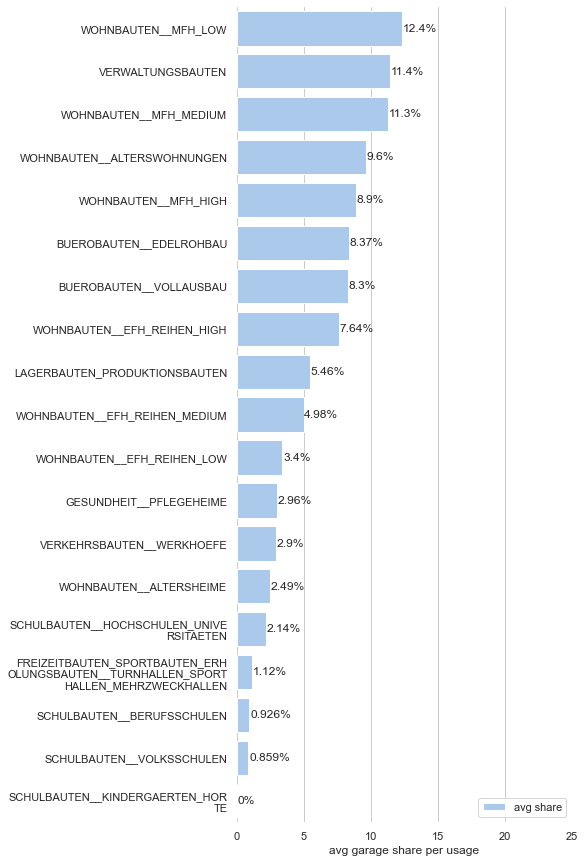

In [9]:
import src.package.consts as fields

garages = grg.garage_avg_per_usage(df)
garages = gen.drop_lessthan(garages, MIN_ITEMS)
garages = garages[[fields.FIELD_ID, im_usages.NOM_PRIMARY_USAGE, im_usages.NOM_SECONDARY_USAGE, 'garages_avg', 'garage_total_percentage']]
garages = garages.drop_duplicates(im_usages.NOM_PRIMARY_USAGE)
garages = garages.nlargest(SHOW_MAX,'garages_avg')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total garages
sns.set_color_codes("pastel")
sns.barplot(x='garages_avg', y=im_usages.NOM_PRIMARY_USAGE, data=garages,
            label="avg share", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 25), ylabel="",
       xlabel="avg garage share per usage")
sns.despine(left=True, bottom=True)
ax.set_yticklabels([textwrap.fill(e, 30) for e in garages[im_usages.NOM_PRIMARY_USAGE]])

# add axis value labels, formatted as percentage
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.05,
            p.get_y() + p.get_height() / 2,
            '{0:.3g}%'.format(width),
            ha = 'left',
            va = 'center')